Goal: Utilize Numpy, Matplotlib, Pandas, SciKitLearn for performing analysis on some housing pricing data.

In [ ]:
# load in the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# load in the data
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
!ls

sample_data  USA_Housing.csv


In [ ]:
#get the data
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
#frame of the data
df.info

<bound method DataFrame.info of       Avg. Area Income  ...                                            Address
0         79545.458574  ...  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1         79248.642455  ...  188 Johnson Views Suite 079\nLake Kathleen, CA...
2         61287.067179  ...  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3         63345.240046  ...                          USS Barnett\nFPO AP 44820
4         59982.197226  ...                         USNS Raymond\nFPO AE 09386
...                ...  ...                                                ...
4995      60567.944140  ...                   USNS Williams\nFPO AP 30153-7653
4996      78491.275435  ...              PSC 9258, Box 8489\nAPO AA 42991-3352
4997      63390.686886  ...  4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998      68001.331235  ...                          USS Wallace\nFPO AE 73316
4999      65510.581804  ...  37778 George Ridges Apt. 509\nEast Holly, NV 2...

[5000 rows x 7 colu

In [ ]:
#summary statistics
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


We have loaded in the libraries and our data. Now let's try to make some basic visualizations for the data. 

We will create linecharts, bar charts, histograms.

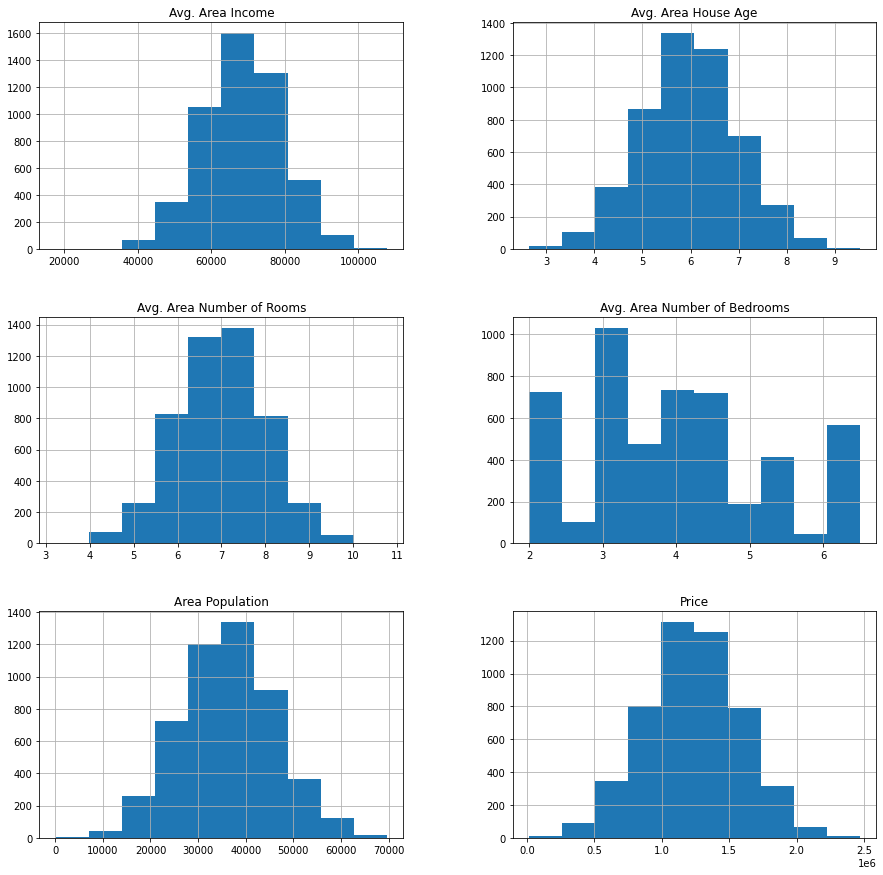

In [ ]:
# First, let us get a histogram of all numerical columns.
plt.rcParams['figure.figsize'] = [15, 15] # make the plot bigger so the subplots don't overlap
df.hist(); # use a semicolon to supress return value

In [ ]:
#let's try something basic. A scatterplot between Avg Area Income
# and Avg Area Number of Bedrooms

#First let us put the average area income into a dataframe
avg_area_income = df.iloc[:,0]
avg_area_income.head()

0    79545.458574
1    79248.642455
2    61287.067179
3    63345.240046
4    59982.197226
Name: Avg. Area Income, dtype: float64

In [ ]:
#now we do the same for the number of beds
avg_area_bedrooms = df.iloc[:,3]
avg_area_bedrooms.head()

0    4.09
1    3.09
2    5.13
3    3.26
4    4.23
Name: Avg. Area Number of Bedrooms, dtype: float64

In [ ]:
#nice. We have two series, but how do we use the series of visualizations?
#the answer is to covert them into arrays
avg_area_income[0]

79545.45857431678

In [ ]:
# let's convert our series into np arrays
x = avg_area_income.to_numpy()
y = avg_area_bedrooms.to_numpy()

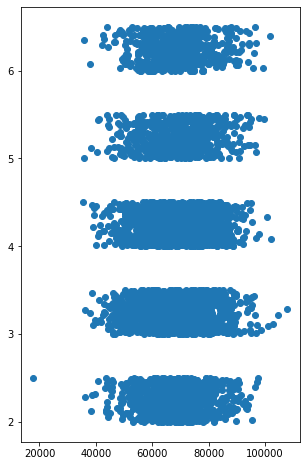

In [ ]:
#excellent. Now we'll try some basic plot comparisons between them
fig=plt.figure(figsize=(5,8))
plt.scatter(x,y)
plt.xlabel = 'Average Area Income'
plt.ylabel = 'Average Area Bedroom Number'
plt.title = 'Average Area: Income to Bedrooms'
plt.show();

Now let's apply some Linear Regression.

In [ ]:
# Inputs = all numerical catagories besides Price
# Outputs = Price
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [ ]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split
# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
#first we instantiate a classifer
from sklearn.linear_model import LinearRegression

In [ ]:
#now we train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# evaluate the model's performance
xG = model.score(X_train, y_train)
yG = model.score(X_test, y_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9190168588916074
0.9158280762331042


In [ ]:
#how you can make predictions
predictions = model.predict(X_test)
predictions

array([ 985734.93779804, 1121195.52891313,  953195.07910656, ...,
       1509833.36141336, 1802074.21547832, 1402539.76192052])

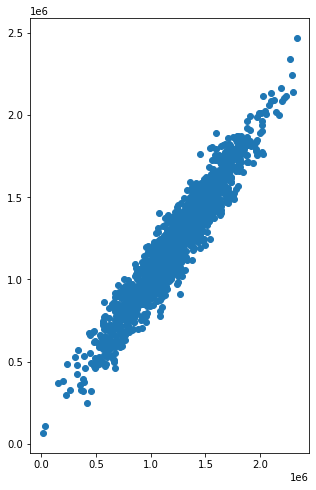

In [ ]:
fig=plt.figure(figsize=(5,8))
plt.scatter(yt_np, predictions)

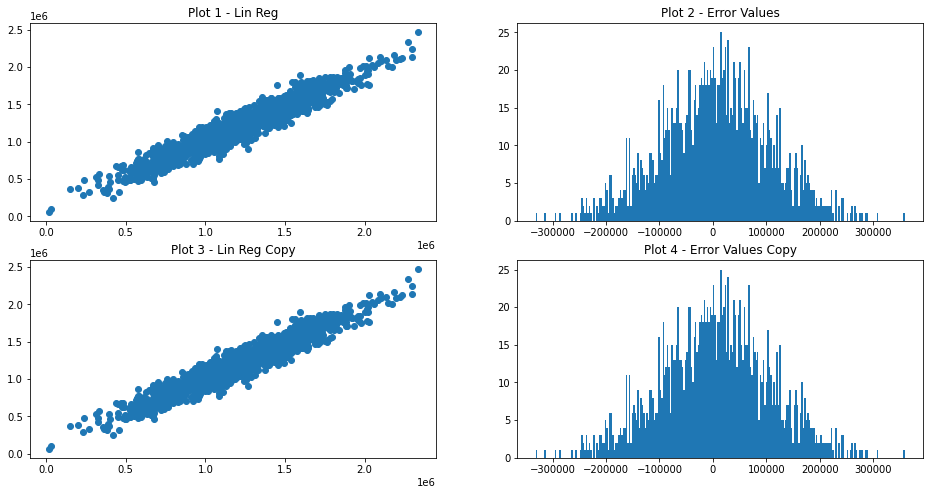

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(16,8))

axes[0][0].scatter(yt_np, predictions)
axes[0][0].set_title('Plot 1 - Lin Reg')

axes[0][1].hist(y_test - predictions, bins = 250)
axes[0][1].set_title('Plot 2 - Error Values')

axes[1][0].scatter(yt_np, predictions)
axes[1][0].set_title('Plot 3 - Lin Reg Copy')

axes[1][1].hist(y_test - predictions, bins = 250)
axes[1][1].set_title('Plot 4 - Error Values Copy')

plt.show()